In [61]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
%matplotlib inline
pd.set_option('mode.chained_assignment', None)
%config InlineBackend.figure_formats = set(['retina'])
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

**Table of Contents**

1. Section 1: Introduction
      * 1A: Outline
      * 1B: Introducing data set
      * 1C: Load data set
2. Section 2: Analysis 1
      * 1A: Implementing regression models for birth rate
      * 1B: Difference in the $ R^2 $ parameter for the two models
3. Section 3: Analysis 2
      * 2A: Implementing regression models for number of storks
      * 2B: Difference in the RMSE parameter for the two models

## Section 1. Introduction
The aim of this analysis is to compare regression models and explain whether we can be confident that one of the models explains more of the variability in the target variable and has better performance than the other model.

### Section 1A. Outline
Section 1 loads the data, which has 5 variables, including the number of storks, birth rates, human population, land size, and suitable area percent in 17 countries. Section 2 implements two regression models to predict the birth rate and plots the distribution of the difference in the $R^2$ for the two models. In Section 3, two regression models are constructed to predict a number of storks, and distribution of the difference in the $RMSE$ for the two models is plotted.



### Section 1B. Introducing data set

Data is showing Geographic, human, and stork data for 17 European countries from Britannica Yearbook 1990. The data set has 5 numerical variables, which are the number of storks, birth rates, human population, land size, and suitable area percent in 17 different countries.

| Variable|Description| Units | 
|:----------|:---------|:------:|
|Country          | Country name   |  |
|Area   | Land Size                 | km^2 |
|Storks       | Number of storks | pairs | 
|Humans      | Population size                | 10^6 |
|BirthRate           | Number of Births        | 10^3/year |
|SuitableAreaPercent     | Land area suitable for Storks         | % |

### Section 1C. Loading data set


The data is loaded from a CSV file. The country name is used as an index rather than a variable in the data set. 

In [62]:
df = pd.read_csv('storks.csv', index_col = 'Country') #loading data
display(df.head())

,Area,Storks,Humans,BirthRate,SuitableAreaPercent
Country,,,,,
Albania,28750,100,3.2,83,55.68
Austria,83860,300,7.6,87,38.34
Belgium,30520,1,9.9,118,65.93
Bulgaria,111000,5000,9.0,117,57.99
Denmark,43100,9,5.1,59,81.46


## Section 2. Analysis 1



The aim of Analysis 1 is to compare two regression models to explain the variability of the birthrate. Model 1 uses the number of storks as a predictor and Model 2 uses the population size as a predictor.

### Section 2A. Implementing regression models for number of births

In the following two regression models are constructed to predict a number of births $ (10^3/year) $ and scatter plots of the actual values against the predicted values are created.

* Model 1 : the number of storks is a predictor
* Model 2 : the population size is a predictor
* Target : the birthrate

$ R^2 $ coefficient is printed to quantify the goodness of fitness.

#### Model 1 :

Model 1 is constructed with the number of storks to predict the birth rate.

The coefficient of determination, regression coefficient and scatter plot of predicted versus actual are printed.

In [63]:
#implementing model 1
y = df.BirthRate 
X_storks = np.column_stack([df.Storks])
reg_1 = LinearRegression().fit(X_storks, y)
y_hat1 = reg_1.predict(X_storks)

print('The R2 coefficient of determination is %4.3f' % reg_1.score(X_storks, y))
print('Variable number of Storks (pairs) has coefficient: %.2f '% reg_1.coef_ )

The R2 coefficient of determination is 0.385
Variable number of Storks (pairs) has coefficient: 0.03 


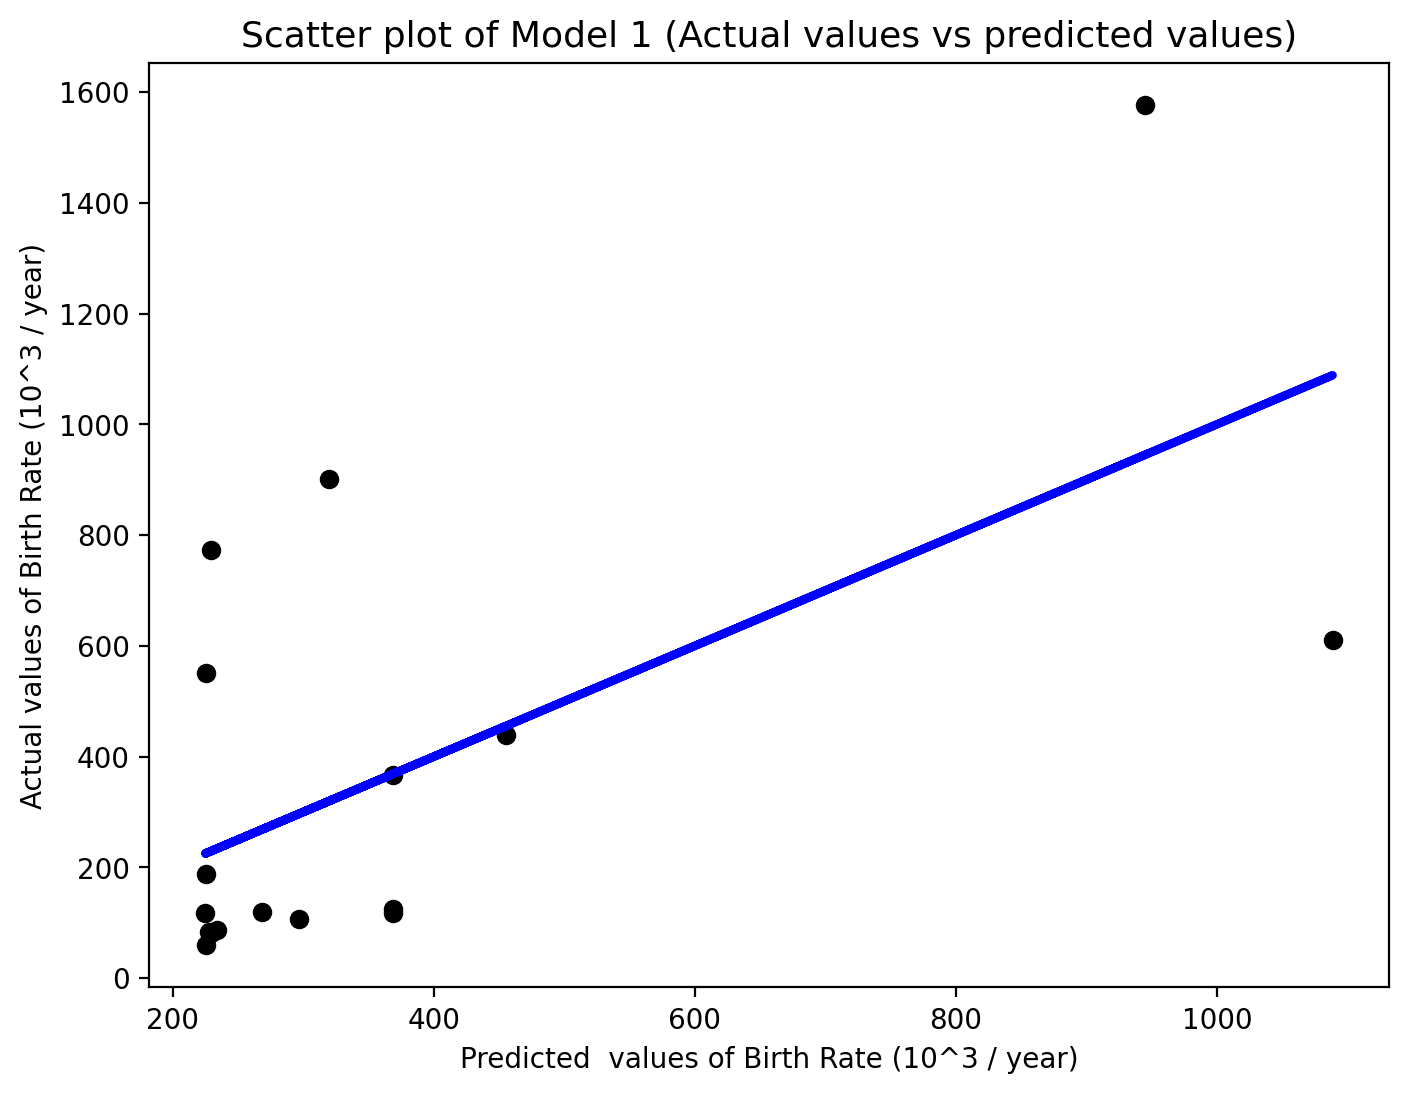

In [64]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat1, y,  color='black')
a.plot(y_hat1, y_hat1, color='blue', linewidth=3)
a.set_title('Scatter plot of Model 1 (Actual values vs predicted values)', fontsize = 13)
a.set_xlabel('Predicted  values of Birth Rate (10^3 / year)')
a.set_ylabel('Actual values of Birth Rate (10^3 / year)');

#### <font color='blue'> Discussion of model 1: </font>

1. $ R^2 $ shows how well the data fit the regression model. 0.385 indicates that the independent variables explain 38.5% of the variation in the target variable. Thus, model 1 can't predict well.
2. From the regression coefficient, we can see how the predictor impacts the target variable. As the number of storks (pairs) increases, the birth rate $(10^3/year)$ increases by 0.03.
3. As shown in the scatter plot of Model 1, points are dispersed from the predicted line. This indicates the number of storks is not explaining much of a variation in the Birth Rate. If the regression fitted better, the points would be nearer to the blue line. 

#### Model 2 :

Model 2 is constructed with the population size to predict the birth rate. 

The coefficient of determination,regression coefficient and scatter plot of predicted versus actual are printed.

In [65]:
#implementing model 2
y = df.BirthRate
X_Humans = np.column_stack([df.Humans])
reg_2 = LinearRegression().fit(X_Humans,y)
y_hat2 = reg_2.predict(X_Humans)
print('The R2 coefficient of determination is %4.3f' % reg_2.score(X_Humans, y))
print('Variable population size has coefficient: %.2f '% reg_2.coef_ )

The R2 coefficient of determination is 0.725
Variable population size has coefficient: 14.83 


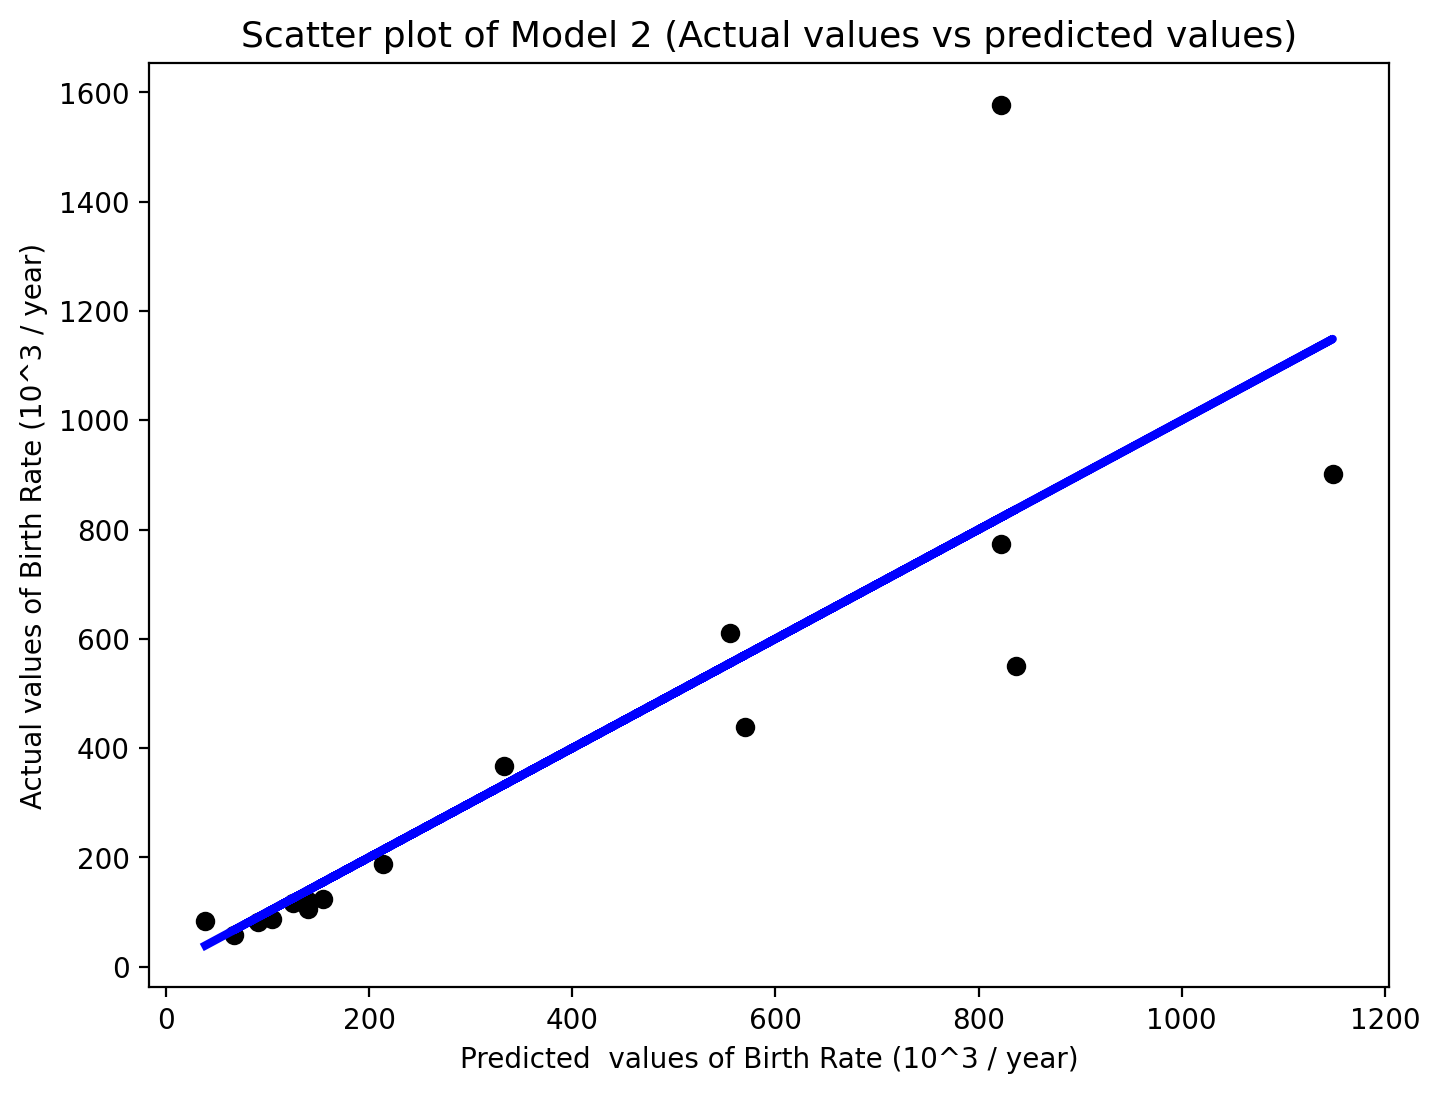

In [66]:
# Plotting scatter plots
y_hat2 = reg_2.predict(X_Humans)
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(8,6))
a.scatter(y_hat2, y,  color='black')
a.plot(y_hat2, y_hat2, color='blue', linewidth=3)

a.set_title('Scatter plot of Model 2 (Actual values vs predicted values)', fontsize = 13)
a.set_xlabel('Predicted  values of Birth Rate (10^3 / year)')
a.set_ylabel('Actual values of Birth Rate (10^3 / year)');

#### <font color='blue'> Discussion of Model 2 : </font>

1. $R^2$ value of 0.725 indicates that the independent variables explain 72.5% of the variation in the target variable. This explains model 2 fits better than model 1. 
2. As printed above, the Variable population size has a coefficient of 14.83. This explains that the birth rate  (10^3/year)  increases by 14.83 for a number of humans (10^6) increases.
3. As shown in a scatter plot of Model 2, the regression fitted better so that the points are near the blue line. 

### Section 2B. Difference in the $ R^2 $ parameter for the two models

In this Analysis 2B, the Bootstrap resampling technique is applied to estimate the difference in the $ R^2 $ parameter for the two models to compare whether one of the models explains more of the variability in the number of births than the other model.

* The following <font color='blue'>bootstrapC </font> uses the `sklearn.resample` to resample a data frame and apply a function to the new data frame and accumulate the results.
* To use the bootstrap function, a suitable function <font color='blue'> doRegression </font> is defined to be applied to the resampled dataframes.
* Using <font color='blue'> doRegression </font> and <font color='blue'>bootstrapC </font> functions, data is resampled the original data 500 times, and calculated the difference in the $R^2$ coefficient for the two models. 
* <font color='red'> bstrap </font> contains $R^2$ value of each model and difference of $ R^2 $ parameter for the two models.
* Finally, the distribution of $R^2$ is plotted and confidence intervals for the difference in the R2 values are estimated.

In [67]:
# Creating bootstrap function
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
    
    for i in range(0, repeats):
        result.iloc[i] = func(resample(data))
    return result

,Model 1,Model 2,Diff
0,0.797518,0.773663,-0.023855
1,0.000116,0.954454,0.954338
2,0.175999,0.963704,0.787704
3,0.242761,0.959806,0.717045
4,0.048591,0.945831,0.897240


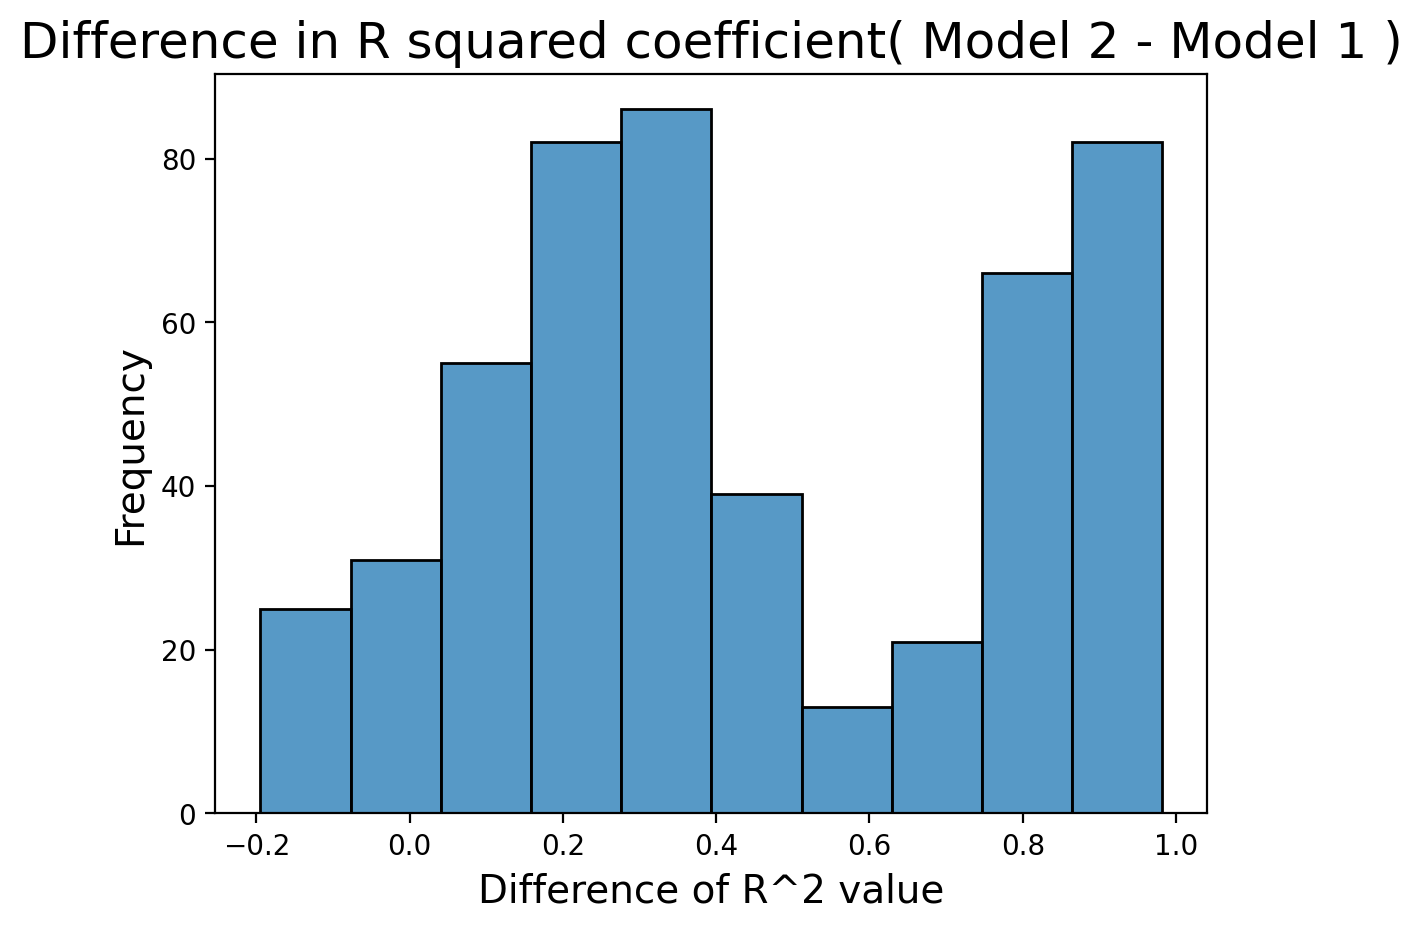

In [68]:
# Creating suitable function for bootstrap
def doRegression(df) :
    y = df.BirthRate 
    X_sr = np.column_stack([df.Storks])
    X_hu = np.column_stack([df.Humans])
    reg1 = LinearRegression().fit(X_sr, y)
    reg2 = LinearRegression().fit(X_hu, y)
    return [reg1.score(X_sr, y), reg2.score(X_hu, y), 
            reg2.score(X_hu, y) - reg1.score(X_sr, y)] 

bstrap = bootstrapC(df, ['Model 1', 'Model 2', 'Diff'], 500, doRegression) 
display(bstrap.head())
sns.histplot(data = bstrap, x = 'Diff')
plt.title('Difference in R squared coefficient( Model 2 - Model 1 )', fontsize=18)
plt.xlabel('Difference of R^2 value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [69]:
sampleDiff = doRegression(df)[2]
print("The difference between the R2 of two models (Model 2 - Model 1) is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (sampleDiff,  bstrap['Diff'].quantile(0.1),  bstrap['Diff'].quantile(0.9)))
print("The difference between the R2 of two model (Model 2 - Model 1) is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (sampleDiff,  bstrap['Diff'].quantile(0.05), bstrap['Diff'].quantile(0.95)))
print("The difference between the R2 of two model (Model 2 - Model 1) is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (sampleDiff,  bstrap['Diff'].quantile(0.005), bstrap['Diff'].quantile(0.995)))

The difference between the R2 of two models (Model 2 - Model 1) is 0.34 with 80% CI 0.02 to 0.90
The difference between the R2 of two model (Model 2 - Model 1) is 0.34 with 90% CI -0.07 to 0.93
The difference between the R2 of two model (Model 2 - Model 1) is 0.34 with 99% CI -0.18 to 0.97


### <font color='black'> Main findings of the Analysis 1 : </font>

1. According to $R^2$ values of two models in section 2A, Model 2 is explaining more of the variability in the birth rate than the other model.

2. The distribution of the difference in the R squared coefficient has two peaks, which means Bimodal Distribution. This indicates that the difference of $R^2$ values has two groups. One is centered around 0.2 and another one is centered around 0.8. 

3. As shown in the distribution of the difference in the R squared coefficient, it seems that Model 2 predominantly explains more of the variability in the birth rate than model 1. Because most of the difference of $ R^2$  values are over 0 since the difference of $ R^2$ value is (Model 2 - Model 1).

4. It seems that the true difference of $R^2$ values mostly falls around 0 to 0.4 and 0.8 to 1.0. However, we can see from confidence intervals how stable the estimate is.

5. From confidence intervals, we can be 80% confident that the true difference in R squared value is between 0.02 to 0.90. This means we can be 80% confident that Model 2 explains more of the variability in the birth rate than the model. Conversely, there is a 20% chance that the true difference in R squared value is fewer than 0.02 or more than 0.90.

3. Since this 80% CI does not contain the value zero, this means we think that zero is not a reasonable value for the true difference in $R^2$ between two models. In other words, at a 80% CI, we would say that there is a significant difference in the $R^2$ for the two models. Thus, at a 80% CI, Model 2 explains the variability in the birth rate than model.

6. However, at 90% CI, Difference in R squared value is between -0.07 to 0.93. At 99% CI, Difference in R squared value is between -0.18 to 0.97. Since these confidence intervals contain the value zero, this means we think that zero is a reasonable value for the true difference in $R^2$ values for the two models. In other words, at a 90% and 99% CI, we would say that there is not a significant difference in the $R^2$ values for the two models.
 

## Section 3. Analysis 2

The aim of this analysis is to compare the performance of two regression models to predict the number of storks. The first model uses the land area as a predictor and the second model uses population density and the area of suitable land as predictors.

### Section 3A. Implementing regression models for number of storks

In the following, two regression models are implemented.

* Model 1 : the land area is predictor 
* Model 2 : population density and area of suitable land are predictors 
* Target : number of storks

To evaluate quality of regression models, $R^2$, $RMSE$ and scatter plot of each model are shown below.

#### Model 1:

Model 1 is constructed with land area to predict number of storks as follows.

The coefficient of determination,regression coefficient and scatter plots of predicted versus actual are printed.

In [70]:
#Implementing Model 1
X_1 = np.column_stack([df.Area])
y = df.Storks
reg1 = LinearRegression().fit(X_1, y)
y_hat3 = reg1.predict(X_1)

print('The R2 coefficient of determination is %4.3f' % reg1.score(X_1, y))
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat3, squared=False))
print('Variable Land area has coefficient: %.2f ' % reg1.coef_)

The R2 coefficient of determination is 0.336
Root of the mean squared error: 6984.77
Variable Land area has coefficient: 0.02 


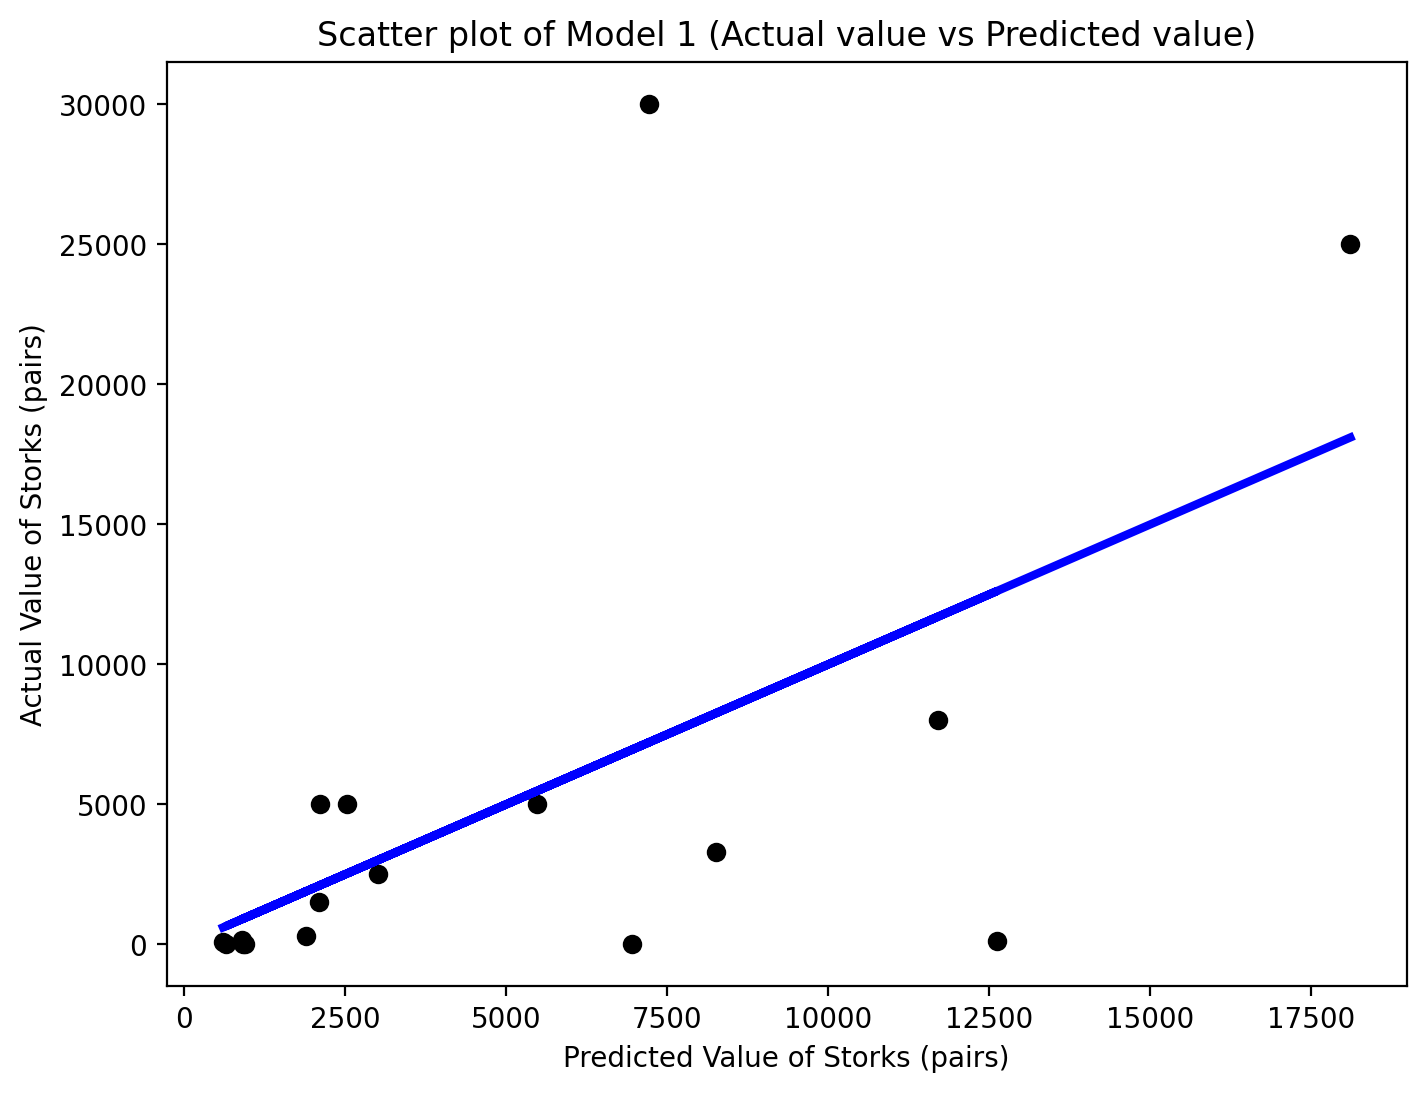

In [71]:
y_hat3 = reg1.predict(X_1)
fig, a = plt.subplots(1,1, figsize = (8,6))
a.scatter(y_hat3, y , color = 'black')
a.plot(y_hat3, y_hat3, color = 'blue',linewidth=3)
a.set_xlabel('Predicted Value of Storks (pairs)')
a.set_ylabel('Actual Value of Storks (pairs)')
a.set_title('Scatter plot of Model 1 (Actual value vs Predicted value)');

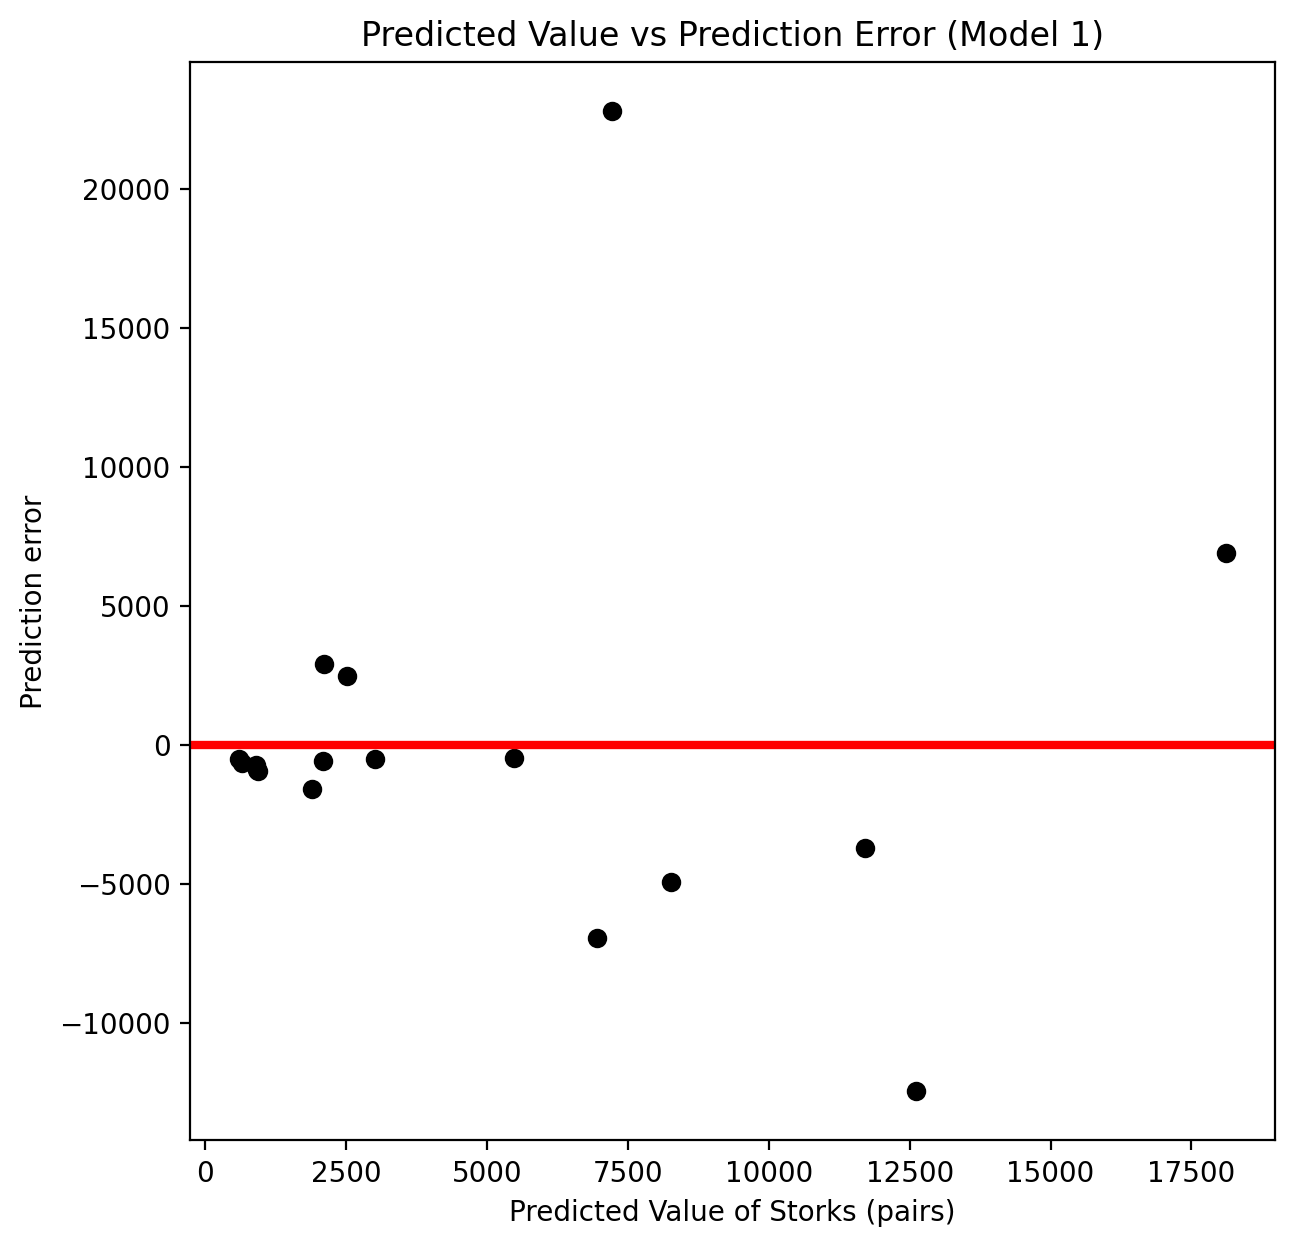

In [72]:
fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat3, (y-y_hat3), color='black')
plt.axhline(y = 0, color ="red", linewidth=3)

a.set_title('Predicted Value vs Prediction Error (Model 1)')
a.set_xlabel('Predicted Value of Storks (pairs)')
a.set_ylabel('Prediction error');

#### <font color='blue'> Discussion of Model 1: </font>

1. $ R^2 $ value of 0.336 indicates that the independent variables explain 33.6% of the variation in the target variable.  This explains model cant predict well.

2. RMSE value of 6984.77  indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. 

3. Variable Land area has a coefficient of 0.02, which means the number of stork  (pairs)  increases by 0.02 for the land area ($km^2$) increases.

4. As shown in the scatter plot of Model 1, points are dispersed from the blue line. This indicates the land area is not explaining much in a variation of the number of Storks.

5. Second plot (Predicted Value vs Prediction Error (Model 1)) should show no pattern ideally. It is clear that the largest errors are related to the high number of Storks.

#### Model 2:

Model 2 is constructed with population density and area of suitable land to predict number of storks as follows.

* Population density is calculated by population size and land area size.
* Population density is assigned to data frame as <font color='red'> Pop_d </font>.
* Area of suitable land is calculated by Suitable area percent and land area.
* Area of suitable land is added to data frame as <font color='red'> Suitableland </font>.

In [73]:
df = df.assign(Pop_d = df.Humans*10**6/df.Area, 
               SuitableLand = df.SuitableAreaPercent/100 * df.Area )
df.head()

,Area,Storks,Humans,BirthRate,SuitableAreaPercent,Pop_d,SuitableLand
Country,,,,,,,
Albania,28750,100,3.2,83,55.68,111.304348,16008.000
Austria,83860,300,7.6,87,38.34,90.627236,32151.924
Belgium,30520,1,9.9,118,65.93,324.377457,20121.836
Bulgaria,111000,5000,9.0,117,57.99,81.081081,64368.900
Denmark,43100,9,5.1,59,81.46,118.329466,35109.260


The coefficient of determination and scatter plots of predicted versus actual are printed below.

In [74]:
#Implementing model 2
X_2 = np.column_stack((df.Pop_d, df.SuitableLand))
y = df.Storks
reg2 = LinearRegression().fit(X_2, y)
y_hat4 = reg2.predict(X_2)

print('The R2 coefficient of determination is %4.3f' % reg2.score(X_2, y))
print('The intercept is %4.1f' % reg2.intercept_)
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat4, squared=False))

The R2 coefficient of determination is 0.393
The intercept is 1881.4
Root of the mean squared error: 6677.03


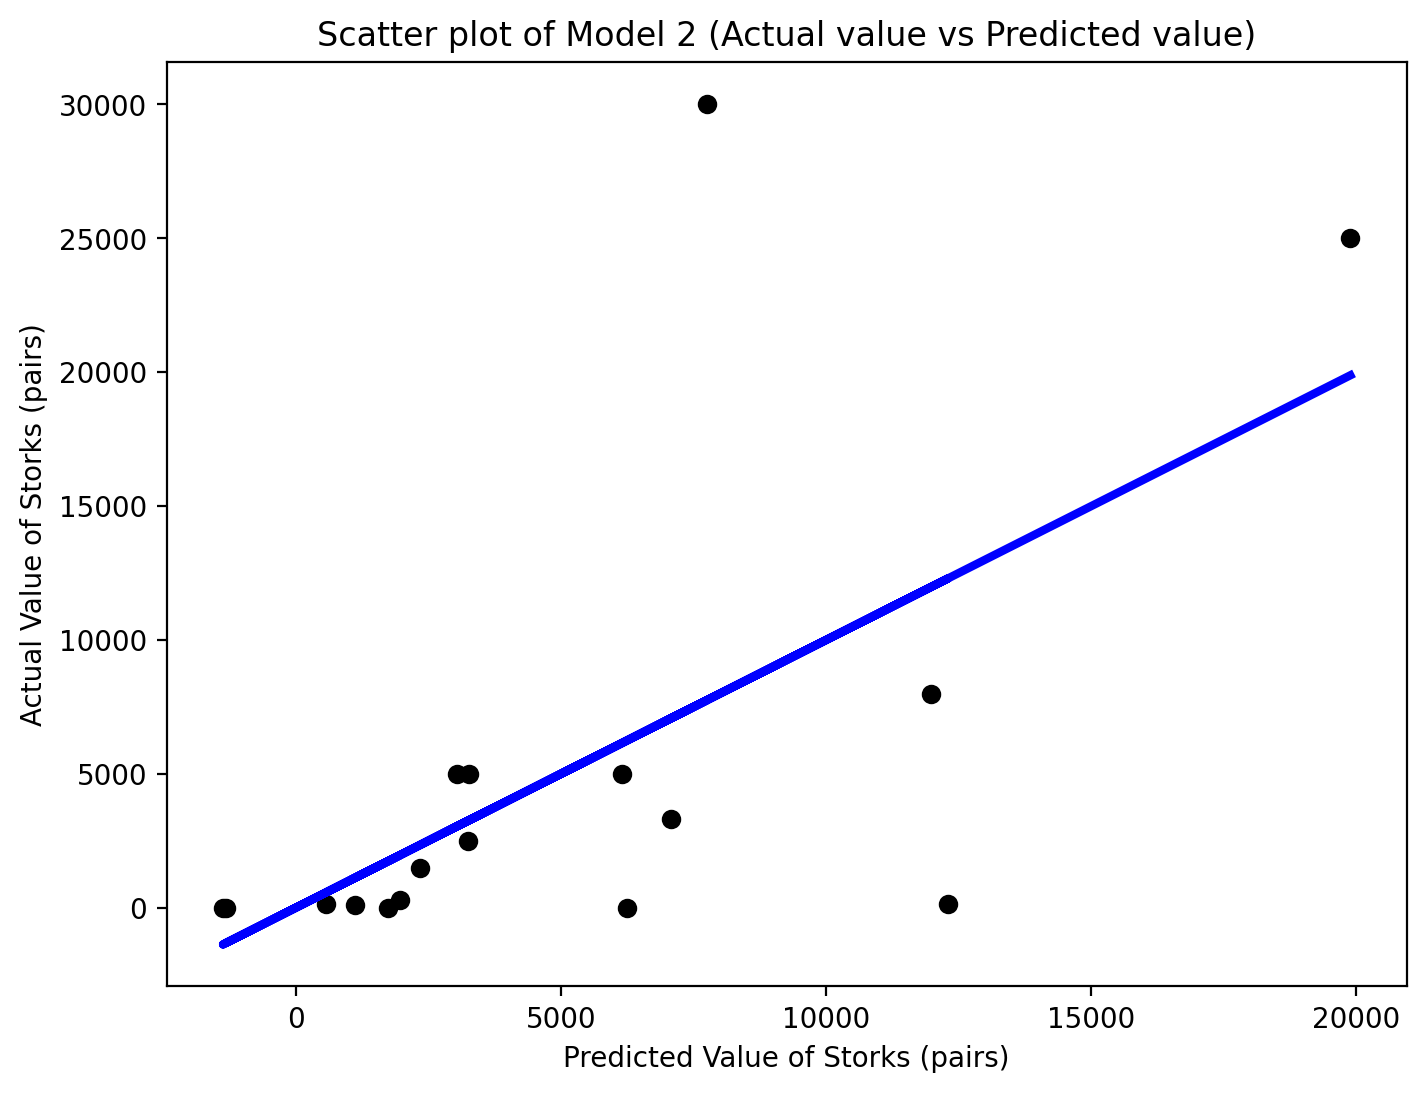

In [75]:
fig, a = plt.subplots(1,1, figsize = (8,6))
a.scatter(y_hat4, y , color = 'black')
a.plot(y_hat4, y_hat4, color = 'blue',linewidth=3)
a.set_xlabel('Predicted Value of Storks (pairs)')
a.set_ylabel('Actual Value of Storks (pairs)')
a.set_title('Scatter plot of Model 2 (Actual value vs Predicted value)');

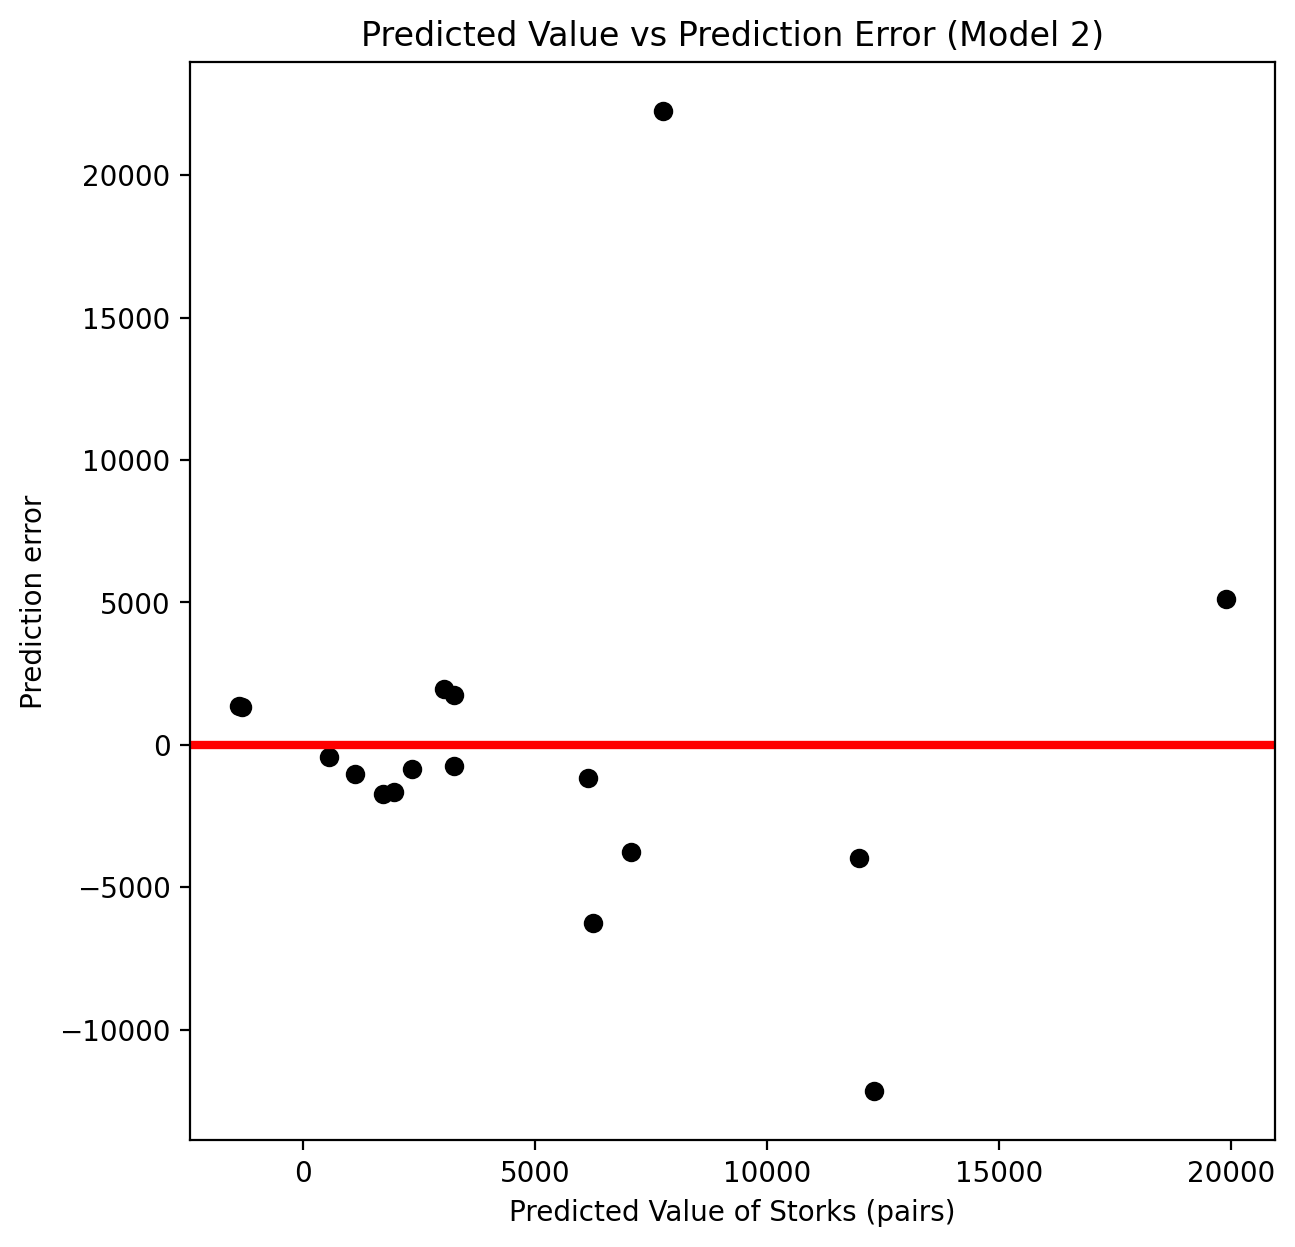

In [76]:
fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_hat4, (y-y_hat4), color='black')
plt.axhline(y = 0, color ="red", linewidth=3)

a.set_title('Predicted Value vs Prediction Error (Model 2)')
a.set_xlabel('Predicted Value of Storks (pairs)')
a.set_ylabel('Prediction error');

Coefficients of Model 2  is compared below as follows.

In [77]:
print('Variable population density has coefficient %5.4f' % reg2.coef_[0])
print('Variable  area of suitable land has coefficient %5.4f' % reg2.coef_[1])

Variable population density has coefficient -12.1326
Variable  area of suitable land has coefficient 0.0367


In [78]:
Popd_range = df.Pop_d.quantile(0.9) - df.Pop_d.quantile(0.1)
Land_range = df.SuitableLand.quantile(0.9) - df.SuitableLand.quantile(0.1)
Storks_range = df.Storks.quantile(0.9) - df.Storks.quantile(0.1)


print ('The change in number of Storks (as a percent of its range) given by the population density coefficient (over its range) is %4.1f percent'
       % (100 * (reg2.coef_[0] * Popd_range) / Storks_range))

print ('The change in number of Storks (as a percent of its range) given by the area of suitable land coefficient (over its range) is %4.1f percent'
       % (100 * (reg2.coef_[1] * Land_range) /  Storks_range))

The change in number of Storks (as a percent of its range) given by the population density coefficient (over its range) is -15.1 percent
The change in number of Storks (as a percent of its range) given by the area of suitable land coefficient (over its range) is 71.6 percent


#### <font color='blue'> Discussion of Model 2: </font>

1. $ R^2 $ value of 0.393 indicates that the independent variables explain 39.3% of the variation in the target variable. This explains model can't predict well.

2. RMSE value of 6677.03  indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values. This explains Model 2 has better performance than Model 1.

3. As shown in scatter plot of Model 2, points are dispersed from blue line. This indicates predictors are not explaining much in a variation of the number of Storks.

4. In the second plot (Predicted Value vs Prediction Error (Model 2)), It is clear that the largest errors are related to the high number of Storks and specifically above 5000.

5. The factor that has less impact in this model is population density. As the population density ($1/km^2$) increases, the number of storks (pairs) decreases by -12.1326. The change in the number of Storks (as a percent of its range) given by the population density coefficient (over its range) is -15.1 percent.

6. The area of suitable land has more impact than population density. The change in the number of Storks (as a percent of its range) given by the area of suitable land coefficient (over its range) is 71.6 percent.

### Section 3B. Difference in the RMSE parameter for the two models

Using the bootstrap technique, the aim of this section is to explain whether we can be confident that one model predicts the number of storks better than the other model.

* Similarly in Section 2B,  <font color='blue'> doRegression </font> and <font color='blue'>bootstrapC </font> functions are used to calculate difference in the $RMSE$ coefficient for the two models is calculated.

* <font color='red'> bstrap2 </font> contains $ RMSE$  values of each model and difference in $RMSE$ coefficient for the two models.

,Model 1,Model 2,Diff
0,8535.960800,8305.933307,230.027493
1,10086.244788,9687.144720,399.100068
2,4409.510755,3864.859027,544.651728
3,2928.870100,2371.504266,557.365834
4,6245.266589,5923.115363,322.151227


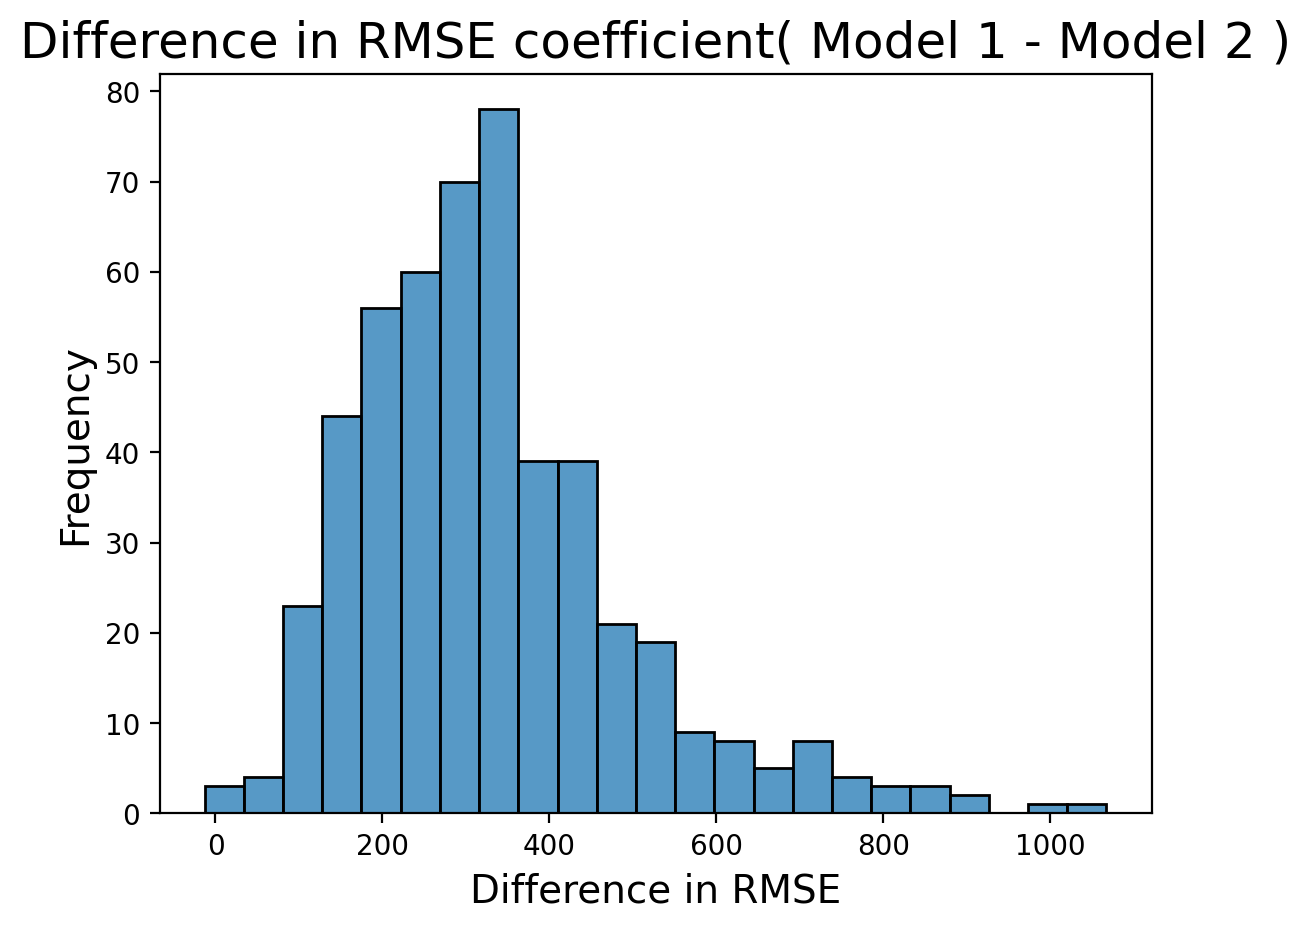

In [79]:
def doRegression(df) :
    y = df.Storks
    X_2 = np.column_stack((df.Pop_d, df.SuitableLand))
    X_A = np.column_stack([df.Area])
    reg1 = LinearRegression().fit(X_A, y)
    reg2 = LinearRegression().fit(X_2, y)
    y_hat1 = reg1.predict(X_A)
    y_hat2 = reg2.predict(X_2)
    rmse1 = mean_squared_error(y, y_hat1, squared=False)
    rmse2 = mean_squared_error(y, y_hat2, squared=False)
    Diff = rmse1 - rmse2
    return [rmse1, rmse2, Diff] 

bstrap2 = bootstrapC(df, ['Model 1', 'Model 2', 'Diff'], 500, doRegression) 
display(bstrap2.head())
sns.histplot(data = bstrap2, x = 'Diff')
plt.title('Difference in RMSE coefficient( Model 1 - Model 2 )', fontsize=18)
plt.xlabel('Difference in RMSE', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [80]:
sampleDiff = doRegression(df)[2]
print("The difference between the RMSE of two models (Model 1 - Model 2) is %3.2f with 80%% CI %3.2f to %3.2f" % 
      (sampleDiff, bstrap2['Diff'].quantile(0.1), bstrap2['Diff'].quantile(0.9)))
print("The difference between the RMSE of two model (Model 1 - Model 2) is %3.2f with 90%% CI %3.2f to %3.2f" % 
      (sampleDiff, bstrap2['Diff'].quantile(0.05), bstrap2['Diff'].quantile(0.95)))
print("The difference between the RMSE of two model (Model 1 - Model 2) is %3.2f with 99%% CI %3.2f to %3.2f" % 
      (sampleDiff, bstrap2['Diff'].quantile(0.005),bstrap2['Diff'].quantile(0.995)))

The difference between the RMSE of two models (Model 1 - Model 2) is 307.74 with 80% CI 148.18 to 538.54
The difference between the RMSE of two model (Model 1 - Model 2) is 307.74 with 90% CI 122.53 to 652.26
The difference between the RMSE of two model (Model 1 - Model 2) is 307.74 with 99% CI 28.31 to 913.69


### <font color='black'> Main findings of the Analysis 2 : </font>

1. According to section 3A, Model 2 has a lower RMSE value than Model 1. This means Model 2 predicts better than Model 1 since RMSE indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.

2. In the distribution of the difference in RMSE, it is clear that most of the difference of RMSE falls over 0. A very small number of differences in RMSE is below 0. This indicates that most of the time, RMSE of model 2 is lower than RMSE of model 1. Again, Model 2 is predicting better than Model 1.

3. At 80%, 90%, and 99%, RMSE value is always greater than 0. This means we would say that there is a significant difference in the RMSE value between two models. Thus, we can conclude that Model 2 predicts better than Model 1.